## Подготовка среды

In [35]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00


In [75]:
import os
import shutil as sh
import zipfile as zf
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('content')

Drive already mounted at content; to attempt to forcibly remount, call drive.mount("content", force_remount=True).


## Чтение и распаковка данных

In [ ]:
REMOTE_PATH = 'content/MyDrive/Segmentation'
REMOTE_DATASET_ZIP = f'{REMOTE_PATH}/Dataset.zip'
DATASET_PATH = 'dataset'
DATASET_ZIP = f'{DATASET_PATH}/Dataset.zip'

In [ ]:
if os.path.exists(DATASET_PATH):
  sh.rmtree(DATASET_PATH)
os.makedirs(DATASET_PATH)

In [ ]:
sh.copy(REMOTE_DATASET_ZIP, DATASET_ZIP)

'dataset/Dataset.zip'

In [ ]:
with zf.ZipFile(DATASET_ZIP) as f:
  f.extractall(DATASET_PATH)

## Просмотр изображений

In [79]:
def draw_ds(ds):
  plt.figure(1, figsize=(16, 10))
  plt.subplot(1, 3, 1)
  plt.title('Оригинальное изображение', fontweight='bold')
  plt.imshow(ds.pixel_array, cmap='gray')
  plt.axis('off')

  # plt.subplot(1, 3, 2)
  # plt.title('Сегментирование грудной клетки', fontweight='bold')
  # plt.imshow(rotated_image1[:, :, n], cmap='gray')
  # plt.axis('off')

  # plt.subplot(1, 3, 3)
  # plt.title('Сегментирование плеврального выпота', fontweight='bold')
  # plt.imshow(image_data2[:, :, n], cmap='gray')
  # plt.axis('off')

  plt.show()

In [63]:
def get_flat_filename_list(path, extention):
  filelist = []
  items = [item for item in sorted(os.listdir(path))]
  for item in items:
    if os.path.isdir(f'{path}/{item}'):
      filelist += get_flat_filename_list(f'{path}/{item}', extention)
    else:
      if item.endswith(extention): 
        filelist.append(f'{path}/{item}')
  return filelist

In [68]:
files = get_flat_filename_list(DATASET_PATH, '.dcm')
print(len(files))
for f in files[:4]: print(f)
for f in files[-4:]: print(f)

48568
dataset/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-001.dcm
dataset/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-002.dcm
dataset/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-003.dcm
dataset/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-001/09-18-2008-StudyID-NA-69331/0.000000-NA-82046/1-004.dcm
dataset/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-422/07-25-2010-NA-NA-06557/0.000000-NA-42364/1-113.dcm
dataset/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-422/07-25-2010-NA-NA-06557/0.000000-NA-42364/1-114.dcm
dataset/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-422/07-25-2010-NA-NA-06557/0.000000-NA-42364/1-115.dcm
dataset/Dataset/manifest-1586193031612/NSCLC-Radiomics/LUNG1-422/07-25-2010-NA-NA-06557/0.000000-NA-42364/1-116.dcm


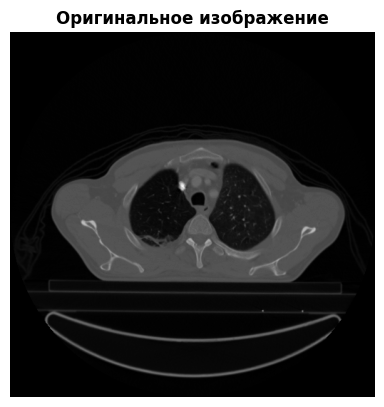

In [80]:
n = len(files)
img_path = files[np.random.randint(0, n, 1)[0]]
ds = dicom.dcmread(img_path)
draw_ds(ds)